In [90]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [156]:
df = pd.read_csv("life_expectancy.csv")
# Look at columns
print(df.columns)

# Are there a lot of nan values?
df.isna().sum()
# Low amount 

Index(['Country', 'Year', 'Mean Years of Schooling, female (years)',
       'Share of seats in parliament, male (% held by men)',
       'Mean Years of Schooling (years)', 'Inequality in income',
       'Carbon dioxide emissions per capita (production) (tonnes)',
       'Expected Years of Schooling, male (years)',
       'Expected Years of Schooling (years)',
       'Labour force participation rate, female (% ages 15 and older)',
       'Population with at least some secondary education, female (% ages 25 and older)',
       'Expected Years of Schooling, female (years)',
       'Adolescent Birth Rate (births per 1,000 women ages 15-19)',
       'Material footprint per capita (tonnes)',
       'Mean Years of Schooling, male (years)',
       'Population with at least some secondary education, male (% ages 25 and older)',
       'Share of seats in parliament, female (% held by women)',
       'Inequality in eduation', 'Gender Development Index (value)',
       'Coefficient of human inequa

Country                                                                               0
Year                                                                                  0
Mean Years of Schooling, female (years)                                             281
Share of seats in parliament, male (% held by men)                                  290
Mean Years of Schooling (years)                                                       0
Inequality in income                                                               3748
Carbon dioxide emissions per capita (production) (tonnes)                             5
Expected Years of Schooling, male (years)                                           359
Expected Years of Schooling (years)                                                   0
Labour force participation rate, female (% ages 15 and older)                       253
Population with at least some secondary education, female (% ages 25 and older)     368
Expected Years of Schooling, fem

In [157]:
def new_col_name(name):
    if "(" in name:
        name = name[:name.index("(")]
    return "_".join(x.replace(",","").lower() for x in name.split())

df = df.rename(columns = new_col_name)

In [158]:
train, test = train_test_split(df, test_size = 0.25)

In [159]:
# 2a)
pearson = train.loc[:, train.columns != "country"].corr(method="pearson")["life_expectancy_at_birth_both_sexes"]
pearson = pearson.sort_values(key = lambda x : abs(x))

display(pearson)

male_deaths                                                -0.008515
total_deaths                                               -0.009997
female_deaths                                              -0.011746
male_population_as_of_1_july                                0.022718
total_population_as_of_1_july                               0.023948
total_population_as_of_1_january                            0.024617
female_population_as_of_1_july                              0.025234
mean_age_childbearing                                       0.042610
live_births_surviving_to_age_1                             -0.070730
births                                                     -0.075551
population_change                                          -0.095804
population_sex_ratio_as_of_1_july                           0.110354
natural_change_births_minus_deaths                         -0.113419
net_migration_rate                                          0.134069
births_by_women_aged_15_to_19     

LEB = 34.84 + 51.11 * HDI


/home/olle/.local/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


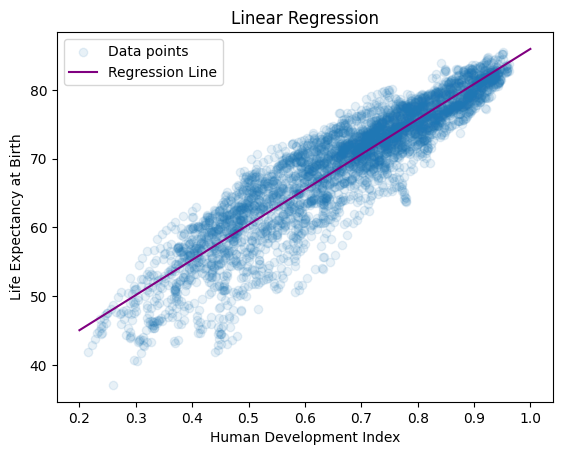

In [160]:
# 2b)
model = LinearRegression()
model.fit(train[["human_development_index"]], train["life_expectancy_at_birth_both_sexes"])
print(f"LEB = {model.intercept_:.2f} + {model.coef_[0]:.2f} * HDI")

xfit=np.array([0.2,1])         # Define x values for which we want to predict y
yfit= model.predict (xfit[:,np.newaxis]) # Predict y values based on the fitted model

plt.scatter(train["human_development_index"], train["life_expectancy_at_birth_both_sexes"], alpha = 0.1, label = "Data points")
plt.plot(xfit, yfit, color='purple', label='Regression Line')
plt.xlabel('Human Development Index')
plt.ylabel('Life Expectancy at Birth')
plt.legend()
plt.title('Linear Regression')
plt.show()

In [161]:
# 2c)
y_pred = model.predict(test[["human_development_index"]])
y_true = np.array(test["life_expectancy_at_birth_both_sexes"])
print(f"MSE: {mean_squared_error(y_true, y_pred):.2f} years^2")
print(f"Correlation: {np.corrcoef(y_pred, y_true)[1,0]:.2f}")


MSE: 13.24 years^2
Correlation: 0.92


In [162]:
# fig, ax = plt.subplots(len(train.columns), 1, figsize = (14, 200))
# for axis, col in zip(ax.flatten(), train.columns):
#     if col == "country":
#         continue
#     axis.hist(train[col], bins = 50)
#     axis.set_title(col)

# plt.show()

train["log_gross_national_income_per_capita"] = np.log(train["gross_national_income_per_capita"])
test["log_gross_national_income_per_capita"] = np.log(test["gross_national_income_per_capita"])

print(f"Corr before log: {np.corrcoef(train['gross_national_income_per_capita'], train['life_expectancy_at_birth_both_sexes'])[0,1]:.2f}")
print(f"Corr after log: {np.corrcoef(train['log_gross_national_income_per_capita'], train['life_expectancy_at_birth_both_sexes'])[0,1]:.2f}")

Corr before log: 0.65
Corr after log: 0.83


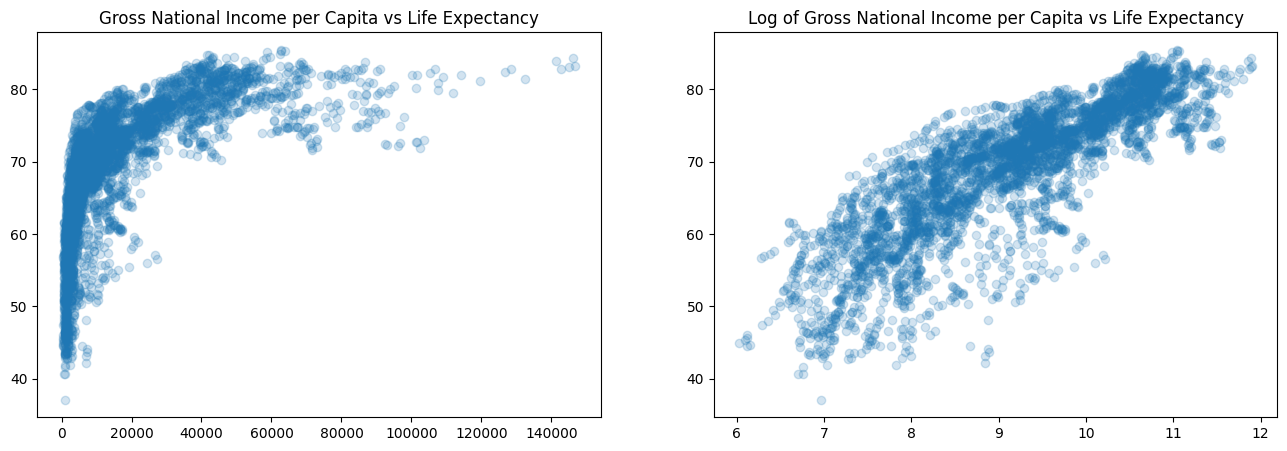

In [163]:
fig, ax = plt.subplots(1, 2, figsize=(16,5))

ax[0].scatter(train["gross_national_income_per_capita"], train['life_expectancy_at_birth_both_sexes'], alpha = 0.2)
ax[0].set_title("Gross National Income per Capita vs Life Expectancy")

ax[1].scatter(train["log_gross_national_income_per_capita"], train['life_expectancy_at_birth_both_sexes'], alpha = 0.2)
ax[1].set_title("Log of Gross National Income per Capita vs Life Expectancy")

plt.show()

LEB = 10.45 + 6.41 * LNI


/home/olle/.local/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


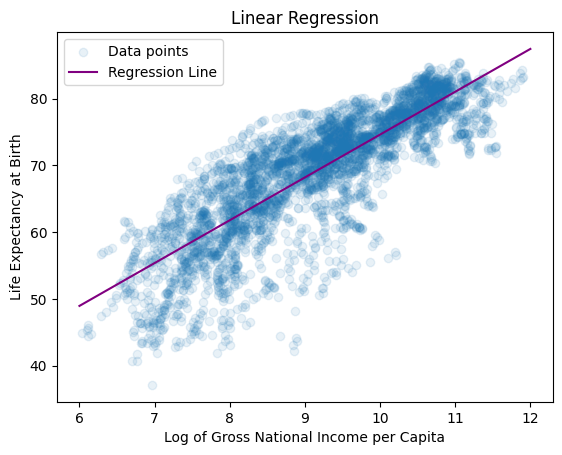

In [164]:
model = LinearRegression()
model.fit(train[["log_gross_national_income_per_capita"]], train["life_expectancy_at_birth_both_sexes"])
print(f"LEB = {model.intercept_:.2f} + {model.coef_[0]:.2f} * LNI")

xfit=np.array([6, 12])         # Define x values for which we want to predict y
yfit= model.predict (xfit[:,np.newaxis]) # Predict y values based on the fitted model

plt.scatter(train["log_gross_national_income_per_capita"], train["life_expectancy_at_birth_both_sexes"], alpha = 0.1, label = "Data points")
plt.plot(xfit, yfit, color='purple', label='Regression Line')
plt.xlabel('Log of Gross National Income per Capita')
plt.ylabel('Life Expectancy at Birth')
plt.legend()
plt.title('Linear Regression')
plt.show()

In [165]:
y_pred = model.predict(test[["log_gross_national_income_per_capita"]])
y_true = np.array(test["life_expectancy_at_birth_both_sexes"])
print(f"MSE: {mean_squared_error(y_true, y_pred):.2f} years^2")
print(f"Correlation: {np.corrcoef(y_pred, y_true)[1,0]:.2f}")


MSE: 25.99 years^2
Correlation: 0.83


In [166]:
model = LinearRegression()
model.fit(train[["human_development_index", "log_gross_national_income_per_capita"]], train["life_expectancy_at_birth_both_sexes"])

y_pred = model.predict(test[["human_development_index", "log_gross_national_income_per_capita"]])
y_true = np.array(test["life_expectancy_at_birth_both_sexes"])
print(f"MSE: {mean_squared_error(y_true, y_pred):.2f} years^2")
print(f"Correlation: {np.corrcoef(y_pred, y_true)[1,0]:.2f}")

MSE: 12.73 years^2
Correlation: 0.92


In [167]:
# Choose a third variable
pearson = train.loc[:, train.columns != "country"].corr(method="pearson")["life_expectancy_at_birth_both_sexes"]
hdi_corr = train.loc[:, train.columns != "country"].corr(method="pearson")["human_development_index"]
log_corr = train.loc[:, train.columns != "country"].corr(method="pearson")["log_gross_national_income_per_capita"]

# We want to find a variable that is correlated with 
score = np.abs(pearson) - np.abs(hdi_corr) 

score.sort_values()

mean_years_of_schooling                                    -0.158250
population_with_at_least_some_secondary_education_male     -0.154640
mean_years_of_schooling_male                               -0.154310
population_with_at_least_some_secondary_education_female   -0.151531
mean_years_of_schooling_female                             -0.149843
inequality_in_eduation                                     -0.135621
gender_development_index                                   -0.114417
expected_years_of_schooling_male                           -0.113401
expected_years_of_schooling                                -0.112709
expected_years_of_schooling_female                         -0.108244
log_gross_national_income_per_capita                       -0.102665
carbon_dioxide_emissions_per_capita                        -0.093750
labour_force_participation_rate_male                       -0.093423
rate_of_natural_change                                     -0.089457
gross_national_income_per_capita  

In [168]:
model = LinearRegression()
model.fit(train[["human_development_index", "log_gross_national_income_per_capita", "crude_death_rate"]], train["life_expectancy_at_birth_both_sexes"])

y_pred = model.predict(test[["human_development_index", "log_gross_national_income_per_capita", "crude_death_rate"]])
y_true = np.array(test["life_expectancy_at_birth_both_sexes"])
print(f"MSE: {mean_squared_error(y_true, y_pred):.2f} years^2")
print(f"Correlation: {np.corrcoef(y_pred, y_true)[1,0]:.2f}")

MSE: 7.56 years^2
Correlation: 0.95
